# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

82


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#Creating lists to hold values to later populate dataframe
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries =  []
dates = []
skip_counter = 0

#Beginning of print process
print("Beginning Data Retrieval")
print("------------------------------")

#Loop through each city in cities and generate json link to pull data
for name in cities:
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={name}&appid={weather_api_key}&units=imperial"
    response = requests.get(weather_url).json()

    #Catch exception in case no data found for selected city
    try:
        #Store data into variables
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        #Append data to corresponding lists
        lats.append(lat)
        lons.append(lon)
        max_temps.append(max_temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)

        #Print log of city being processed
        print(f"Processing record {cities.index(name)} | {name.capitalize()}")
        print(f"Data visual: {len(lats)}\n")
    except KeyError:
        print(f"No data found for {name.capitalize()}. Skipping...")

        #Remove city from cities list for easier dataframe creation later
        #cities.remove(name)
        lats.append("")
        lons.append("")
        max_temps.append("")
        humidities.append("")
        clouds.append("")
        wind_speeds.append("")
        countries.append("")
        dates.append("")
        print(f"Data visual: {len(lats)}\n")
        skip_counter += 1

#End of print process
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"Number of Skips: {skip_counter}")

Beginning Data Retrieval
------------------------------
Processing record 0 | Vaini
Data visual: 1

Processing record 1 | Ketchikan
Data visual: 2

Processing record 2 | Punta arenas
Data visual: 3

Processing record 3 | Ushuaia
Data visual: 4

Processing record 4 | Acarau
Data visual: 5

Processing record 5 | Petatlan
Data visual: 6

Processing record 6 | Busselton
Data visual: 7

Processing record 7 | Lasa
Data visual: 8

No data found for Saleaula. Skipping...
Data visual: 9

Processing record 9 | Talnakh
Data visual: 10

Processing record 10 | Rikitea
Data visual: 11

No data found for Sentyabrskiy. Skipping...
Data visual: 12

No data found for Labutta. Skipping...
Data visual: 13

Processing record 13 | Jamestown
Data visual: 14

No data found for Asayita. Skipping...
Data visual: 15

No data found for Belushya guba. Skipping...
Data visual: 16

Processing record 16 | Natal
Data visual: 17

Processing record 17 | Nanortalik
Data visual: 18

Processing record 18 | Dingle
Data visu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Create dataframe
raw_data = {"City": cities, "Lat": lats, "Lon": lons, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": clouds, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}

city_data = pd.DataFrame(raw_data)

#Find indexes where Lat is blank for future removal
index_names = city_data[city_data["Lat"] == ""].index

city_data.drop(index_names, inplace = True)

#Export dataframe to a csv file
city_data.to_csv("../output_data/cities.csv", index = False, header = True)

#Print out cleaned dataframe
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2,-175.2,69.8,83,75,6.93,TO,1602697375
1,ketchikan,55.34,-131.65,44.6,100,75,5.82,US,1602697376
2,punta arenas,-53.15,-70.92,50,53,75,18.34,CL,1602697339
3,ushuaia,-54.8,-68.3,44.6,67,40,26.4,AR,1602697376
4,acarau,-2.89,-40.12,85.84,60,19,21.83,BR,1602697377
...,...,...,...,...,...,...,...,...,...
76,kavaratti,10.57,72.64,82.27,77,97,20.36,IN,1602697397
78,dikson,73.51,80.55,29.26,93,100,24.23,RU,1602697398
79,torbay,47.67,-52.73,55,71,75,19.46,CA,1602697398
80,upernavik,72.79,-56.15,32.7,89,0,3.4,GL,1602697398


In [12]:
over_100 = city_data.loc[city_data["Humidity"] < 50]

over_100

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
13,jamestown,42.1,-79.24,62.01,41,1,12.75,US,1602697195
21,umm bab,25.21,50.81,87.8,43,1,5.82,QA,1602697381
25,turayf,31.67,38.66,73.4,43,23,9.17,SA,1602697382
28,porto nacional,-10.71,-48.42,96.8,32,40,10.29,BR,1602697383
33,karratha,-20.74,116.85,83.93,29,0,16.17,AU,1602697385
37,castro,-24.79,-50.01,85.26,38,51,4.41,BR,1602697386
38,port lincoln,-34.73,135.87,73.8,29,100,22.32,AU,1602697386
41,shelburne,44.08,-80.2,61,36,20,11.41,CA,1602697387
52,albany,42.6,-73.97,66.99,35,0,1.01,US,1602697216
53,pindi bhattian,31.9,73.27,74.64,22,0,3.24,PK,1602697390


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
humid_index = city_data[city_data["Humidity"] < 50].index
humid_index

Int64Index([13, 21, 25, 28, 33, 37, 38, 41, 52, 53, 59, 75], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_index, inplace = False)

clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2,-175.2,69.8,83,75,6.93,TO,1602697375
1,ketchikan,55.34,-131.65,44.6,100,75,5.82,US,1602697376
2,punta arenas,-53.15,-70.92,50,53,75,18.34,CL,1602697339
3,ushuaia,-54.8,-68.3,44.6,67,40,26.4,AR,1602697376
4,acarau,-2.89,-40.12,85.84,60,19,21.83,BR,1602697377
5,petatlan,17.52,-101.27,91.4,59,75,9.17,MX,1602697377
6,busselton,-33.65,115.33,55,71,0,9.1,AU,1602697377
7,lasa,46.62,10.7,48,55,5,1.72,IT,1602697377
9,talnakh,69.49,88.4,24.8,92,90,17.9,RU,1602697378
10,rikitea,-23.12,-134.97,74.05,78,48,18.59,PF,1602697196


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

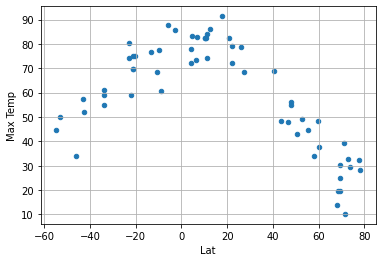

In [15]:
lat_vs_temp = clean_city_data.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True)
plt.xlabel = "Latitude"
plt.ylabel = "Max Temperature (F)"
plt.title = "Latitude vs Max Temp (F)"
plt.savefig = "../output_data/Latitude vs Max Temp.png"
plt.show()

## Latitude vs. Humidity Plot

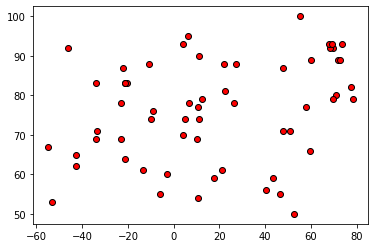

In [16]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker = "o", facecolors = "red", edgecolors = "black")
# plt.ylim(-60, 80)
# plt.ylim(-10, 35)
plt.title = "Latitude vs Humidity"
# plt.xlabel = "Latitude"
# plt.ylabel ="Humidity"
plt.savefig = "../output_data/Latitude vs Humidity.png"
plt.show()

## Latitude vs. Cloudiness Plot

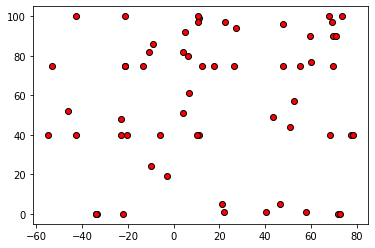

In [17]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Cloudiness"
plt.savefig = "../output_data/Latitude vs Cloudiness.png"
plt.show() 

## Latitude vs. Wind Speed Plot

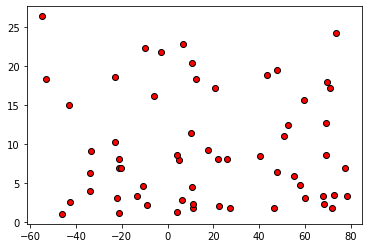

In [18]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker = "o", facecolors = "red", edgecolors = "black")
plt.savefig = "../output_data/Latitude vs Wind Speed.png"
plt.show()

## Linear Regression

In [19]:
north_index = clean_city_data[clean_city_data["Lat"] > 0].index
north_city_data = clean_city_data.drop(north_index, inplace = False)

north_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2,-175.2,69.8,83,75,6.93,TO,1602697375
2,punta arenas,-53.15,-70.92,50,53,75,18.34,CL,1602697339
3,ushuaia,-54.8,-68.3,44.6,67,40,26.4,AR,1602697376
4,acarau,-2.89,-40.12,85.84,60,19,21.83,BR,1602697377
6,busselton,-33.65,115.33,55,71,0,9.1,AU,1602697377
10,rikitea,-23.12,-134.97,74.05,78,48,18.59,PF,1602697196
16,natal,-5.79,-35.21,87.8,55,40,16.11,BR,1602697379
22,avarua,-21.21,-159.78,69.8,64,100,8.05,CK,1602697286
29,ambilobe,-13.2,49.05,76.64,61,75,3.27,MG,1602697384
32,henties bay,-22.12,14.28,59,87,0,3,NA,1602697384


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

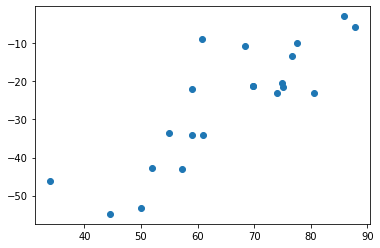

In [20]:
north_index = clean_city_data[clean_city_data["Lat"] > 0].index
north_city_data = clean_city_data.drop(north_index, inplace= False)

x_values = north_city_data["Max Temp"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

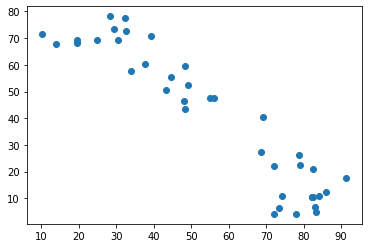

In [21]:
south_index = clean_city_data[clean_city_data["Lat"] < 0].index
south_city_data = clean_city_data.drop(south_index, inplace = False)

x_values = south_city_data["Max Temp"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

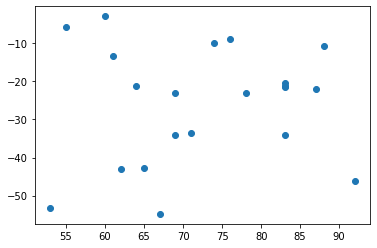

In [22]:
x_values = north_city_data["Humidity"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

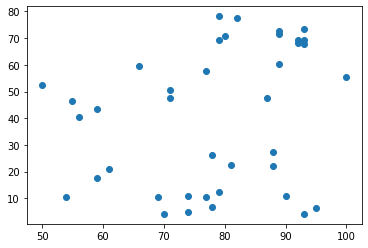

In [23]:
x_values = south_city_data["Humidity"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

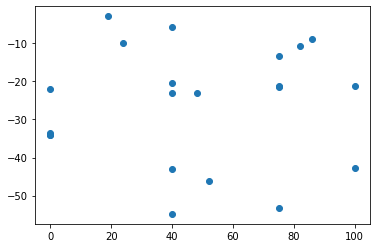

In [24]:
x_values = north_city_data["Cloudiness"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Cloudiness (%)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

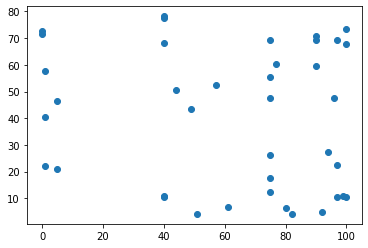

In [25]:
x_values = south_city_data["Cloudiness"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Cloudiness vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

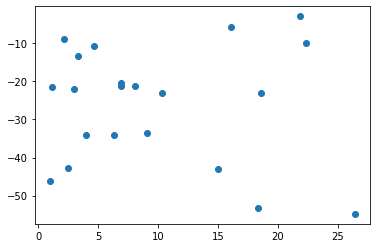

In [26]:
x_values = north_city_data["Wind Speed"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Wind Speed (mph)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

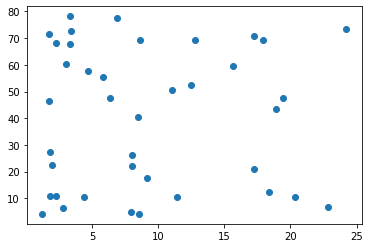

In [27]:
x_values = south_city_data["Wind Speed"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Wind Speed"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (South Hemisphere)"
plt.show()